In [1]:
import numpy as np
import os
from shapely.geometry import Polygon
from shapely.affinity import affine_transform
import json
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from tqdm import tqdm
import pyvista as pv

if 'REPO_PATH' not in locals():
    os.chdir('../')
    REPO_PATH = os.getcwd()

from dubinstracking.pathplanning import OrbitFactory
tqdm.pandas()
plt.rcParams.update({'font.size': 8})

np.float64(10.000000000000007)

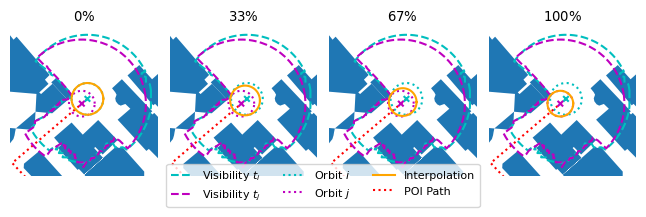

In [2]:
with open('data/uptownCharlotte.json') as f:
    city = [Polygon(item) for item in json.load(f)]

with open('data/environments/paper_small/circles.json') as f:
    orbits = [OrbitFactory.fromJson(item) for item in json.load(f)]

with open('data/environments/paper_small/volumes.json') as f:
    volumes = json.load(f)
    visibility = [np.array(item['polygon']) for item in volumes]
    visibility_points = np.array([item['point'] for item in volumes])

k = 0
fig = plt.figure(figsize=(6.5, 2))
axes = fig.subplots(1, 4)

theta = np.linspace(0, 2 * np.pi, 100)

poly_0 = visibility[k]
poly_1 = visibility[k + 1]
orbit_0 = np.array([orbits[k].xy(t) for t in theta])
orbit_1 = np.array([orbits[k + 1].xy(t) for t in theta])
for i, ax in enumerate(axes.reshape([4])):
    for polygon in city:
        ax.add_patch(patches.Polygon(np.array(polygon.exterior.coords)[:, :2], zorder=0))
    ax.plot(poly_0[:, 0], poly_0[:, 1], 'c--',zorder=1)
    ax.plot(poly_1[:, 0], poly_1[:, 1], 'm--',zorder=2)
    ax.plot(orbit_0[:, 0], orbit_0[:, 1], ':', zorder=0, color='c')
    ax.plot(orbit_1[:, 0], orbit_1[:, 1], ':', zorder=0, color='m')
    ax.scatter(visibility_points[[k, k+1], 0], visibility_points[[k, k+1], 1], s=16, marker='x', c=['c', 'm'], zorder=3)
    ax.plot(visibility_points[:, 0], visibility_points[:, 1], 'r:', zorder=0)
    path = orbit_0 * (1 - i / 3) + orbit_1 * (i / 3)
    ax.plot(path[:, 0], path[:, 1], 'orange', zorder=3)
    ax.set_aspect('equal', 'box')
    ax.set_title(fr'${i / 3 * 100:.0f}\%$')
    ax.set_axis_off()
    ax.set_ylim([325, 525])
    ax.set_xlim([-150, 50])
fig.legend(
    labels=['Visibility $t_i$', 'Visibility $t_j$', 'Orbit $i$', 'Orbit $j$', 'Interpolation', 'POI Path' ],
    handles=[
        Line2D([0], [0], linestyle='--', color='c'),
        Line2D([0], [0], linestyle='--', color='m'),
        Line2D([0], [0], linestyle=':', color='c'),
        Line2D([0], [0], linestyle=':', color='m'),
        Line2D([0], [0], linestyle='-', color='orange'),
        Line2D([0], [0], linestyle=':', color='r'),
    ],
    loc=8,
    ncols=3,
    bbox_to_anchor=(.5, -.05)
)
fig.tight_layout()
fig.savefig('notebooks/figures/morph_circle.pdf', bbox_inches='tight')
np.linalg.norm(visibility_points[k] - visibility_points[k + 1])